In [1]:
# import libraries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import pandas as pd

## Obtaining GTZAN dataset

The dataset is available from [kaggle.com](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download). Please download the file, and paste it into the working directory. There is no online links to download from that allows us to do data preprocessing...

In [2]:
# unzip archive.zip
import zipfile
with zipfile.ZipFile("archive.zip","r") as zip_ref:
    zip_ref.extractall("")

## Preprocessing

In [6]:
# convert .wav to MFCC features
import librosa

def extract_features_mfcc(file_name):
    """
    Extract MFCC features from audio file

    Args:
        file_name (str): path to audio file
    Returns:
        mfccs (np.array): MFCC features
    """
    num_mfcc = 40
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=num_mfcc)
    mfccs = mfccs[:, 0:num_mfcc]
    return mfccs

# save mfcc features to an image
import matplotlib.pyplot as plt
import librosa.display

def save_mfcc_image(mfccs, file_name):
    """
    Save MFCC features as an image

    Args:
        mfccs (np.array): MFCC features
        file_name (str): path to save image
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.savefig(file_name)

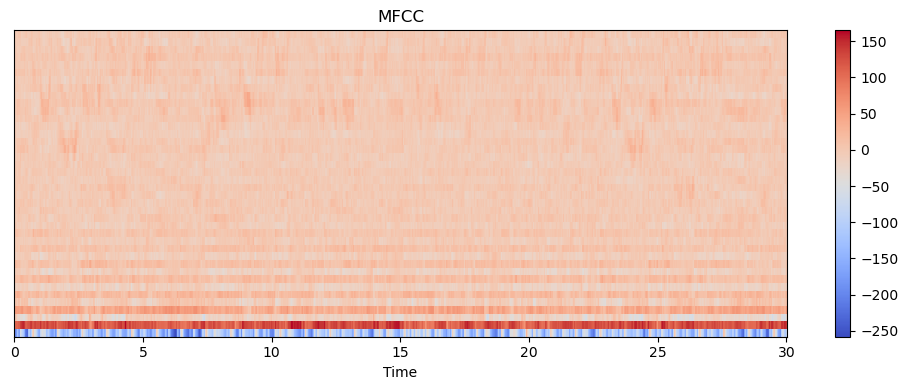

In [7]:
mfccs = extract_features_mfcc('Data/genres_original/blues/blues.00000.wav')
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()